### Natural Language Processing of the KJV Bible
+ Sentiment Analysis
+ EDA
+ Summarization
+ Prediction of Verse

#### Data Sources
+ https://raw.githubusercontent.com/scrollmapper/bible_databases/master/csv/t_kjv.csv

In [1]:
# Load EDA Pkgs
import pandas as pd

In [2]:
# Load Dataset
df = pd.read_csv("t_kjv.csv")

In [3]:
# Columns
df.columns

Index(['id', 'b', 'c', 'v', 't'], dtype='object')

In [4]:
# Head
df.head()

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [5]:
# Rename Books
df1 = df

In [6]:
# Replacing with the correct name
df1.b.replace({1:"Genesis",
2:"Exodus",
3:"Leviticus",
4:"Numbers",
5:"Deuteronomy",
6:"Joshua",
7:"Judges",
8:"Ruth",
9:"1 Samuel (1 Kings)",
10:"2 Samuel (2 Kings)",
11:"1 Kings (3 Kings)",
12:"2 Kings (4 Kings)",
13:"1 Chronicles",
14:"2 Chronicles",
15:"Ezra",
16:"Nehemiah",
17:"Esther",
18:"Job",
19:"Psalms",
20:"Proverbs",
21:"Ecclesiastes",
22:"Song of Solomon (Canticles)",
23:"Isaiah",
24:"Jeremiah",
25:"Lamentations",
26:"Ezekiel",
27:"Daniel",
28:"Hosea",
29:"Joel",
30:"Amos",
31:"Obadiah",
32:"Jonah",
33:"Micah",
34:"Nahum",
35:"Habakkuk",
36:"Zephaniah",
37:"Haggai",
38:"Zechariah",
39:"Malachi",
40:"Matthew",
41:"Mark",
42:"Luke",
43:"John",
44:"Acts",
45:"Romans",
46:"1 Corinthians",
47:"2 Corinthians",
48:"Galatians",
49:"Ephesians",
50:"Philippians",
51:"Colossians",
52:"1 Thessalonians",
53:"2 Thessalonians",
54:"1 Timothy",
55:"2 Timothy",
56:"Titus",
57:"Philemon",
58:"Hebrews",
59:"James",
60:"1 Peter",
61:"2 Peter",
62:"1 John",
63:"2 John",
64:"3 John",
65:"Jude",
66:"Revelation"},inplace=True)

In [7]:
df1.b

0           Genesis
1           Genesis
2           Genesis
3           Genesis
4           Genesis
5           Genesis
6           Genesis
7           Genesis
8           Genesis
9           Genesis
10          Genesis
11          Genesis
12          Genesis
13          Genesis
14          Genesis
15          Genesis
16          Genesis
17          Genesis
18          Genesis
19          Genesis
20          Genesis
21          Genesis
22          Genesis
23          Genesis
24          Genesis
25          Genesis
26          Genesis
27          Genesis
28          Genesis
29          Genesis
            ...    
31073    Revelation
31074    Revelation
31075    Revelation
31076    Revelation
31077    Revelation
31078    Revelation
31079    Revelation
31080    Revelation
31081    Revelation
31082    Revelation
31083    Revelation
31084    Revelation
31085    Revelation
31086    Revelation
31087    Revelation
31088    Revelation
31089    Revelation
31090    Revelation
31091    Revelation


In [8]:
df1.head()

,id,b,c,v,t
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."


In [9]:
# Renaming Columns
df1.columns = ["id","book","chapter","verse","text"]

In [10]:
df1.columns

Index(['id', 'book', 'chapter', 'verse', 'text'], dtype='object')

In [11]:
df1.to_csv("kjv_cleandata1.csv")

#### EDA
+ Longest sentence
+ Shortest sentence


In [12]:
df1.text

0        In the beginning God created the heaven and th...
1        And the earth was without form, and void; and ...
2        And God said, Let there be light: and there wa...
3        And God saw the light, that it was good: and G...
4        And God called the light Day, and the darkness...
5        And God said, Let there be a firmament in the ...
6        And God made the firmament, and divided the wa...
7        And God called the firmament Heaven. And the e...
8        And God said, Let the waters under the heaven ...
9        And God called the dry land Earth; and the gat...
10       And God said, Let the earth bring forth grass,...
11       And the earth brought forth grass, and herb yi...
12       And the evening and the morning were the third...
13       And God said, Let there be lights in the firma...
14       And let them be for lights in the firmament of...
15       And God made two great lights; the greater lig...
16       And God set them in the firmament of the heave.

In [13]:
# Length of Each Sentence
df1["verse_length"] = df1.text.str.len()

In [14]:
# Longest Sentence or Verse In the Bible
df1.text.str.len().max()

528

In [15]:
# Location of text/verse
df1.text.str.len().idxmax()

12826

In [16]:
df1.iloc[12826]

id                                                       17008009
book                                                       Esther
chapter                                                         8
verse                                                           9
text            Then were the king's scribes called at that ti...
verse_length                                                  528
Name: 12826, dtype: object

In [17]:
# Shortest Sentence or Verse in the Bible
df1.text.str.len().min()

2

In [18]:
# Location of text
df1.text.str.len().idxmin()

30673

In [19]:
df1.iloc[30673]

id              64001015
book              3 John
chapter                1
verse                 15
text                  []
verse_length           2
Name: 30673, dtype: object

In [20]:
# Second Longest Verse
df1.text.str.len().nlargest(2)

12826    528
9978     443
Name: text, dtype: int64

In [21]:
# Second shortest verse
df1.text.str.len().nsmallest(2)

30673     2
26558    11
Name: text, dtype: int64

In [22]:
df1.iloc[26558]

id                 43011035
book                   John
chapter                  11
verse                    35
text            Jesus wept.
verse_length             11
Name: 26558, dtype: object

#### NLP
+ Tokens
+ Sentiment Analysis
+ NER

In [23]:
# For Most of the NLP 
import spacy 
nlp = spacy.load('en')

In [24]:
# For Sentiment Analysis
from textblob import TextBlob

In [25]:
def get_sentiment(text):
    docx = TextBlob(text)
    sent = docx.sentiment
    return sent

In [26]:
# Get the First Verse
df1.text.loc[0]

'In the beginning God created the heaven and the earth.'

In [27]:
get_sentiment(df1.text.loc[0])

Sentiment(polarity=0.0, subjectivity=0.0)

In [28]:
df1.text.apply(get_sentiment)

0                                        (0.0, 0.0)
1                                        (0.0, 0.4)
2                                        (0.4, 0.7)
3                         (0.5, 0.6666666666666666)
4                       (0.325, 0.5166666666666666)
5                                        (0.0, 0.0)
6                                        (0.0, 0.1)
7                                        (0.0, 0.0)
8                       (-0.06666666666666665, 0.6)
9         (0.31666666666666665, 0.6000000000000001)
10                                       (0.6, 0.9)
11         (0.6333333333333333, 0.8000000000000002)
12                                       (0.0, 0.0)
13                                       (0.0, 0.0)
14                                       (0.4, 0.7)
15        (0.42000000000000004, 0.6300000000000001)
16                                       (0.4, 0.7)
17                                     (0.55, 0.65)
18                                       (0.0, 0.0)
19          

In [29]:
# Let Make it individual
def get_polarity(text):
    docx = TextBlob(text)
    sent = docx.sentiment.polarity
    return sent

def get_subjectivity(text):
    docx = TextBlob(text)
    sent = docx.sentiment.subjectivity
    return sent

In [30]:
df1['verse_polarity'] = df1.text.apply(get_polarity)
df1['verse_subjectivity'] = df1.text.apply(get_subjectivity)
df1['sentiment'] = df1.text.apply(get_sentiment)

In [31]:
 df1.head()

,id,book,chapter,verse,text,verse_length,verse_polarity,verse_subjectivity,sentiment
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,0.000,0.000000,"(0.0, 0.0)"
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,0.000,0.400000,"(0.0, 0.4)"
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,0.400,0.700000,"(0.4, 0.7)"
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,0.500,0.666667,"(0.5, 0.6666666666666666)"
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,0.325,0.516667,"(0.325, 0.5166666666666666)"


In [32]:
# The Verse with the Highest Positive Sentiment
df1.verse_polarity.max()

1.0

In [33]:
df1.verse_polarity.idxmax()

146

In [34]:
df1.iloc[146]

id                                                              1006009
book                                                            Genesis
chapter                                                               6
verse                                                                 9
text                  These are the generations of Noah: Noah was a ...
verse_length                                                        112
verse_polarity                                                        1
verse_subjectivity                                                    1
sentiment                                                    (1.0, 1.0)
Name: 146, dtype: object

In [35]:
df1.verse_polarity.nlargest(100)

146      1.000
1426     1.000
1431     1.000
1515     1.000
1809     1.000
3390     1.000
4057     1.000
4269     1.000
4286     1.000
4287     1.000
4289     1.000
4392     1.000
4719     1.000
5159     1.000
5397     1.000
5516     1.000
5562     1.000
6084     1.000
7307     1.000
7337     1.000
7383     1.000
7523     1.000
7528     1.000
7549     1.000
7863     1.000
8261     1.000
8482     1.000
8633     1.000
8635     1.000
9046     1.000
         ...  
18193    1.000
20776    1.000
21172    1.000
22736    1.000
23282    1.000
23929    1.000
24501    1.000
24572    1.000
24877    1.000
25347    1.000
25610    1.000
25888    1.000
26960    1.000
27707    1.000
28400    1.000
28675    1.000
28678    1.000
29105    1.000
29285    1.000
29433    1.000
29600    1.000
29623    1.000
30039    1.000
30315    1.000
30475    1.000
31003    1.000
31012    1.000
17735    0.925
30       0.910
312      0.910
Name: verse_polarity, Length: 100, dtype: float64

#### Conclusion
+ There are over 100 positive sentiment with a polarity of 1.0

In [37]:
df1.verse_polarity.nsmallest(100)

476     -1.0
524     -1.0
1103    -1.0
1116    -1.0
1329    -1.0
1358    -1.0
1467    -1.0
1523    -1.0
1654    -1.0
1655    -1.0
1664    -1.0
1745    -1.0
2450    -1.0
2452    -1.0
2477    -1.0
4145    -1.0
4316    -1.0
5277    -1.0
5376    -1.0
5425    -1.0
5468    -1.0
5484    -1.0
5489    -1.0
5491    -1.0
5494    -1.0
5532    -1.0
5700    -1.0
5791    -1.0
6556    -1.0
6575    -1.0
        ... 
10197   -1.0
10202   -1.0
10211   -1.0
10221   -1.0
10309   -1.0
10395   -1.0
10951   -1.0
11451   -1.0
11564   -1.0
11596   -1.0
11630   -1.0
11648   -1.0
11797   -1.0
11910   -1.0
11930   -1.0
11957   -1.0
12005   -1.0
12678   -1.0
12688   -1.0
12814   -1.0
12823   -1.0
12980   -1.0
13532   -1.0
13732   -1.0
13933   -1.0
13977   -1.0
14056   -1.0
14065   -1.0
14090   -1.0
14401   -1.0
Name: verse_polarity, Length: 100, dtype: float64

In [38]:
df1.iloc[476].text

'Behold now, thy servant hath found grace in thy sight, and thou hast magnified thy mercy, which thou hast showed unto me in saving my life; and I cannot escape to the mountain, lest some evil take me, and I die:'

In [39]:
#### NER of Each Sentence
def get_ner(text):
    docx = nlp(text)
    result = [(token.text,token.label_) for token in docx.ents]
    return result

In [40]:
df1.text.iloc[0]

'In the beginning God created the heaven and the earth.'

In [41]:
get_ner(df1.text.iloc[0])

[('earth', 'LOC')]

In [42]:
df1['named_entities'] = df1.text.apply(get_ner)

In [43]:
df1.head()

,id,book,chapter,verse,text,verse_length,verse_polarity,verse_subjectivity,sentiment,named_entities
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,0.000,0.000000,"(0.0, 0.0)","[(earth, LOC)]"
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,0.000,0.400000,"(0.0, 0.4)","[(earth, LOC), (God, PERSON)]"
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,0.400,0.700000,"(0.4, 0.7)","[(God, PERSON)]"
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,0.500,0.666667,"(0.5, 0.6666666666666666)",[]
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,0.325,0.516667,"(0.325, 0.5166666666666666)","[(God, PERSON), (the evening and the morning, ..."


In [44]:
df1.to_csv("kjv_final1.csv")

In [ ]:
#### Predicting New and Old
+ NT 1
+ OT 0
+ Using Naive Bayes

In [53]:
# Last Verse of Old Testament
df1.loc[23144]['text']

id                                                             39004006
book                                                            Malachi
chapter                                                               4
verse                                                                 6
text                  And he shall turn the heart of the fathers to ...
verse_length                                                        153
verse_polarity                                                        0
verse_subjectivity                                                    0
sentiment                                                    (0.0, 0.0)
named_entities                                                       []
Name: 23144, dtype: object

In [54]:
# Last Verse of Old Testament
df1.loc[23144]['text']

'And he shall turn the heart of the fathers to the children, and the heart of the children to their fathers, lest I come and smite the earth with a curse.'

In [55]:
df2 = df1

In [58]:
# Last verse of NT 7,957 
df2.loc[0:23144,'label'] = 0 

In [59]:
df2.head()

,id,book,chapter,verse,text,verse_length,verse_polarity,verse_subjectivity,sentiment,named_entities,label
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,0.000,0.000000,"(0.0, 0.0)","[(earth, LOC)]",0.0
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,0.000,0.400000,"(0.0, 0.4)","[(earth, LOC), (God, PERSON)]",0.0
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,0.400,0.700000,"(0.4, 0.7)","[(God, PERSON)]",0.0
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,0.500,0.666667,"(0.5, 0.6666666666666666)",[],0.0
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,0.325,0.516667,"(0.325, 0.5166666666666666)","[(God, PERSON), (the evening and the morning, ...",0.0


In [60]:
df2.loc[23145:,'label'] = 1

In [61]:
df2.tail()

,id,book,chapter,verse,text,verse_length,verse_polarity,verse_subjectivity,sentiment,named_entities,label
31098,66022017,Revelation,22,17,"And the Spirit and the bride say, Come. And le...",168,0.400000,0.800000,"(0.4, 0.8)","[(Spirit, ORG)]",1.0
31099,66022018,Revelation,22,18,For I testify unto every man that heareth the ...,187,0.000000,0.000000,"(0.0, 0.0)",[],1.0
31100,66022019,Revelation,22,19,And if any man shall take away from the words ...,207,0.000000,0.000000,"(0.0, 0.0)",[],1.0
31101,66022020,Revelation,22,20,"He which testifieth these things saith, Surely...",95,0.416667,0.694444,"(0.41666666666666663, 0.6944444444444444)","[(Jesus, PERSON)]",1.0
31102,66022021,Revelation,22,21,The grace of our Lord Jesus Christ be with you...,57,0.000000,0.000000,"(0.0, 0.0)","[(Jesus Christ, PERSON)]",1.0


In [65]:
# Model ML
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.cross_validation import train_test_split b17
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [70]:
Xfeatures = df2['text']
y = df2['label']

In [71]:
# Feature Extraction 
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9158222915042868

In [74]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Model 91.58222915042869 %


In [75]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_train,y_train)*100,"%")

Accuracy of Model 93.61773597581458 %


In [ ]:
#### Predicting A Text
+ Whether therefore ye eat, or drink, or whatsoever ye do, do all to the glory of God.(1 Corinthians 10:31 )

In [76]:
# Sample1 Prediction
sample_verse = ["Whether therefore ye eat, or drink, or whatsoever ye do, do all to the glory of God"]
vect = cv.transform(sample_verse).toarray()

In [77]:
# Old Testament is 0, New Testament is 1
clf.predict(vect)

array([1.])

In [ ]:
### Example
+ Isaiah 41:10
sample_verse2 = ["Fear thou not; for I am with thee: be not dismayed; for I am thy God: I will strengthen thee; yea, I will help thee; yea, I will uphold thee with the right hand of my righteousness."]

In [79]:

sample_verse2 = ["Fear thou not; for I am with thee: be not dismayed; for I am thy God: I will strengthen thee; yea, I will help thee; yea, I will uphold thee with the right hand of my righteousness."]

In [80]:
vect2 = cv.transform(sample_verse2).toarray()

In [81]:
clf.predict(vect2)

array([0.])

#### Saving the Model

In [82]:
from sklearn.externals import joblib

In [83]:

biblepredictionNV_model = open("biblepredictionNV_model.pkl","wb")

joblib.dump(clf,biblepredictionNV_model)

In [84]:
biblepredictionNV_model.close()

#### Conclusion
+ We Have been able to see the longest and shortest verse
+ Being able to build a model for predicting which part of the bible a particular verse belongs to

In [85]:
# Thanks
# By Jesse JCharis
# Jesus Saves @ JCharisTech
# J-Secur1ty

In [ ]:
 #### Find the Most Common Words
    

In [1]:
from collections import Counter
import pandas as pd


In [2]:
df_new = pd.read_csv("kjv_cleandata.csv")

In [4]:
# Stopwords
from nltk.corpus import stopwords 
stopWords = stopwords.words('english')

In [5]:
df_new.head()

,Unnamed: 0,id,book,chapter,verse,text
0,0,1001001,Genesis,1,1,In the beginning God created the heaven and th...
1,1,1001002,Genesis,1,2,"And the earth was without form, and void; and ..."
2,2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,4,1001005,Genesis,1,5,"And God called the light Day, and the darkness..."


In [6]:
# Removing Stopwords
df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))

0                   In beginning God created heaven earth.
1        And earth without form, void; darkness upon fa...
2                          And God said, Let light: light.
3        And God saw light, good: God divided light dar...
4        And God called light Day, darkness called Nigh...
5        And God said, Let firmament midst waters, let ...
6        And God made firmament, divided waters firmame...
7        And God called firmament Heaven. And evening m...
8        And God said, Let waters heaven gathered toget...
9        And God called dry land Earth; gathering toget...
10       And God said, Let earth bring forth grass, her...
11       And earth brought forth grass, herb yielding s...
12                          And evening morning third day.
13       And God said, Let lights firmament heaven divi...
14       And let lights firmament heaven give light upo...
15       And God made two great lights; greater light r...
16       And God set firmament heaven give light upon e.

In [7]:
df_new["clean_text"] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))

In [8]:
Counter(" ".join(df_new["clean_text"].str.lower()).split()).most_common(100)   

[('and', 12738),
 ('shall', 9838),
 ('unto', 8987),
 ('i', 8708),
 ('thou', 5202),
 ('lord', 4739),
 ('thy', 4600),
 ('ye', 3847),
 ('upon', 2734),
 ('god', 2303),
 ('said', 2285),
 ('hath', 2242),
 ('him,', 2034),
 ('came', 1991),
 ('man', 1978),
 ('son', 1894),
 ('the', 1858),
 ('one', 1823),
 ('king', 1791),
 ('lord,', 1709),
 ('said,', 1680),
 ('for', 1670),
 ('shalt', 1616),
 ('them,', 1607),
 ('come', 1602),
 ('children', 1589),
 ('but', 1542),
 ('thee', 1530),
 ('also', 1518),
 ('let', 1506),
 ('then', 1373),
 ('even', 1333),
 ('made', 1332),
 ('saying,', 1331),
 ('went', 1328),
 ('house', 1315),
 ('go', 1266),
 ('every', 1236),
 ('people', 1229),
 ('thee,', 1211),
 ('me,', 1195),
 ('saith', 1167),
 ('land', 1143),
 ('behold,', 1121),
 ('men', 1112),
 ('israel', 1098),
 ('therefore', 1082),
 ('o', 1065),
 ('hast', 1060),
 ('day', 1059),
 ('make', 1050),
 ('god,', 1027),
 ('may', 1026),
 ('among', 916),
 ('put', 908),
 ('thine', 904),
 ('neither', 876),
 ('great', 870),
 ('hand',

In [10]:
# generate DF out of Counter
newdf = pd.DataFrame(Counter(" ".join(df_new["clean_text"].str.lower()).split()).most_common(100),
                    columns=['Word', 'Frequency']).set_index('Word')

In [11]:
newdf

,Frequency
Word,
and,12738
shall,9838
unto,8987
i,8708
thou,5202
lord,4739
thy,4600
ye,3847
upon,2734


In [12]:
import matplotlib
import matplotlib.pyplot as plt

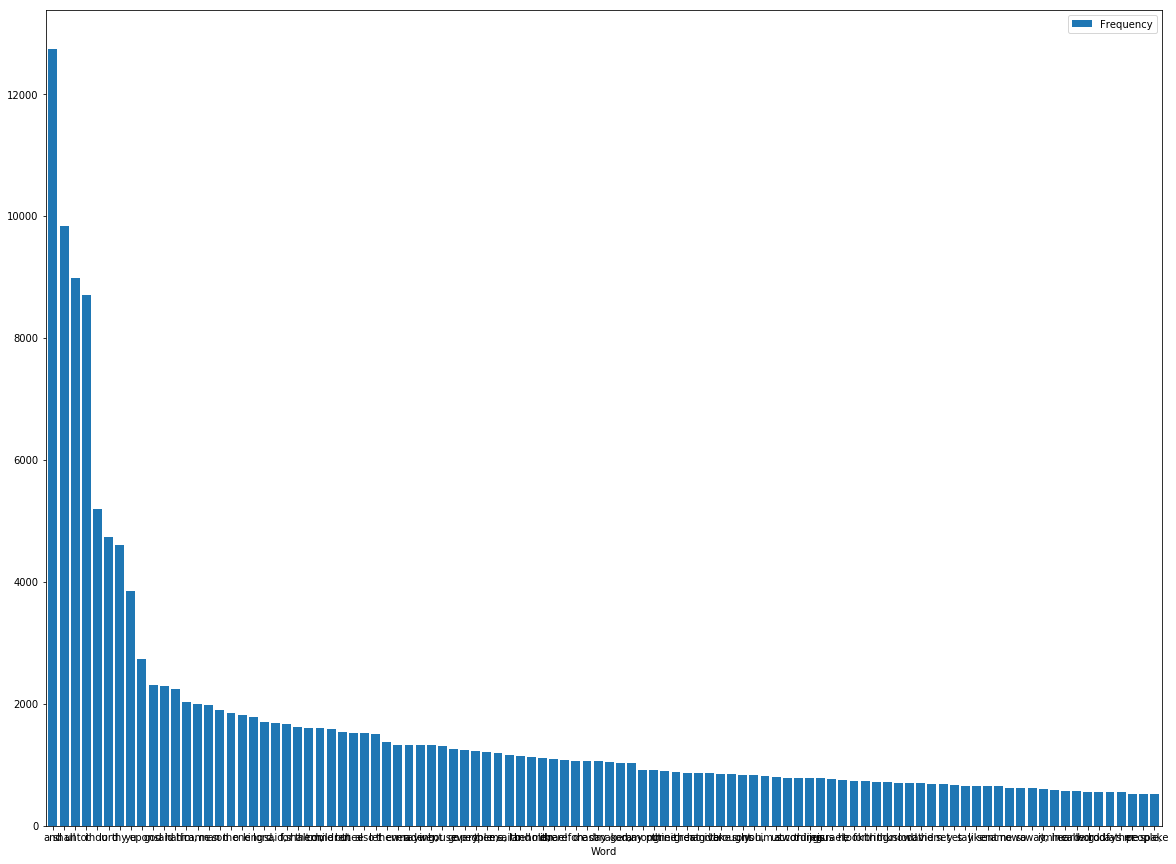

In [15]:
newdf.plot.bar(rot=0, figsize=(20,15), width=0.8)

In [ ]:
#### Some Msc

In [89]:
df1.head()

,id,book,chapter,verse,text,verse_length,verse_polarity,verse_subjectivity,sentiment,named_entities,label
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,0.000,0.000000,"(0.0, 0.0)","[(earth, LOC)]",0.0
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,0.000,0.400000,"(0.0, 0.4)","[(earth, LOC), (God, PERSON)]",0.0
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,0.400,0.700000,"(0.4, 0.7)","[(God, PERSON)]",0.0
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,0.500,0.666667,"(0.5, 0.6666666666666666)",[],0.0
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,0.325,0.516667,"(0.325, 0.5166666666666666)","[(God, PERSON), (the evening and the morning, ...",0.0


In [90]:
df3 = df1[['book','text','label']]

In [110]:
df

,id,book,chapter,verse,text,verse_length,verse_polarity,verse_subjectivity,sentiment,named_entities,label
0,1001001,Genesis,1,1,In the beginning God created the heaven and th...,54,0.000000,0.000000,"(0.0, 0.0)","[(earth, LOC)]",0.0
1,1001002,Genesis,1,2,"And the earth was without form, and void; and ...",142,0.000000,0.400000,"(0.0, 0.4)","[(earth, LOC), (God, PERSON)]",0.0
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,0.400000,0.700000,"(0.4, 0.7)","[(God, PERSON)]",0.0
3,1001004,Genesis,1,4,"And God saw the light, that it was good: and G...",85,0.500000,0.666667,"(0.5, 0.6666666666666666)",[],0.0
4,1001005,Genesis,1,5,"And God called the light Day, and the darkness...",115,0.325000,0.516667,"(0.325, 0.5166666666666666)","[(God, PERSON), (the evening and the morning, ...",0.0
5,1001006,Genesis,1,6,"And God said, Let there be a firmament in the ...",112,0.000000,0.000000,"(0.0, 0.0)","[(God, PERSON)]",0.0
6,1001007,Genesis,1,7,"And God made the firmament, and divided the wa...",144,0.000000,0.100000,"(0.0, 0.1)",[],0.0
7,1001008,Genesis,1,8,And God called the firmament Heaven. And the e...,89,0.000000,0.000000,"(0.0, 0.0)","[(God, PERSON), (the evening and the morning, ...",0.0
8,1001009,Genesis,1,9,"And God said, Let the waters under the heaven ...",126,-0.066667,0.600000,"(-0.06666666666666665, 0.6)","[(God, PERSON), (one, CARDINAL)]",0.0
9,1001010,Genesis,1,10,And God called the dry land Earth; and the gat...,121,0.316667,0.600000,"(0.31666666666666665, 0.6000000000000001)","[(God, PERSON), (Earth, LOC)]",0.0


In [92]:
Xfeatures1 = df3.text
y1 = df3.book

In [94]:
# Feature Extraction 
cv1= CountVectorizer()
X1 = cv.fit_transform(Xfeatures1)

In [95]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [102]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nv_clf = MultinomialNB()


In [103]:
nv_clf.fit(X_train1,y_train1)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [104]:
nv_clf.score(X_test1,y_test1)

0.4169914263445051

In [107]:
# Sample1 Prediction
sample_verse3 = ["Whether therefore ye eat, or drink, or whatsoever ye do, do all to the glory of God"]


In [ ]:
### ToDo
+ Predict particular book of the bible for a particular text